In [2]:
!pip install lifelines
# Load python libraries
import numpy as np
import pandas as pd
import lifelines as ll

# Plotting helpers
from IPython.display import HTML
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.tools as tls   
from plotly.graph_objs import *

from pylab import rcParams
rcParams['figure.figsize']=10, 6

    100% |████████████████████████████████| 215kB 3.0MB/s ta 0:00:011    90% |█████████████████████████████   | 194kB 10.2MB/s eta 0:00:01


In [6]:
from lifelines.estimation import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [7]:
df = pd.read_csv('N_5_Clusters.csv',delimiter=',',engine = 'python')
df.columns

Index(['Cluster', 'Survival', 'Status', 'Unnamed: 3'], dtype='object')

In [8]:
f = df.Cluster==1
T = df[f]['Survival']
C = df[f]['Status']

kmf.fit(T, event_observed=C)

<lifelines.KaplanMeierFitter: fitted with 6 observations, 1 censored>

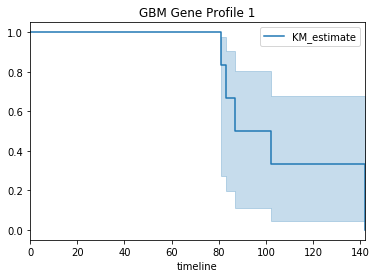

In [9]:
kmf.plot(title='GBM Gene Profile 1')

In [10]:
kmf.median_ ## median overall survival (weeks) of Group 1

102.0

In [11]:
f2 = df.Cluster==2
T2 = df[f2]['Survival']
C2 = df[f2]['Status']

kmf.fit(T2, event_observed=C2)

<lifelines.KaplanMeierFitter: fitted with 17 observations, 2 censored>

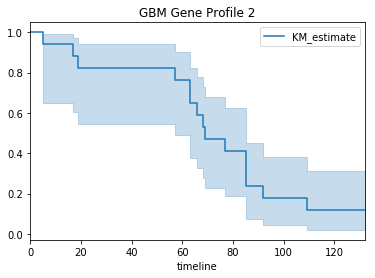

In [12]:
kmf.plot(title='GBM Gene Profile 2')

In [13]:
kmf.median_ ## median overall survival (weeks) of Group 2

69.0

In [14]:
f3 = df.Cluster==3
T3 = df[f3]['Survival']
C3 = df[f3]['Status']

kmf.fit(T3, event_observed=C3)

<lifelines.KaplanMeierFitter: fitted with 4 observations, 0 censored>

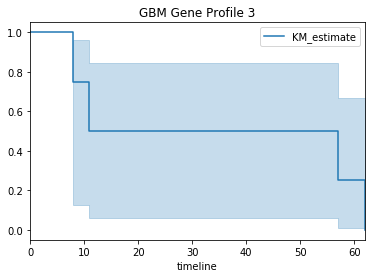

In [15]:
kmf.plot(title='GBM Gene Profile 3')

In [16]:
kmf.median_ ## median overall survival (weeks) of Group 3

11.0

In [17]:
f4 = df.Cluster==4
T4 = df[f4]['Survival']
C4 = df[f4]['Status']

kmf.fit(T4, event_observed=C4)

<lifelines.KaplanMeierFitter: fitted with 5 observations, 0 censored>

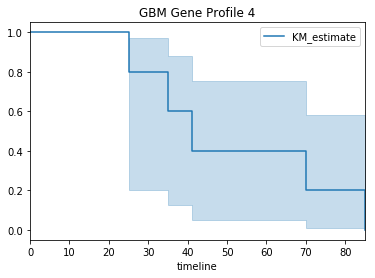

In [18]:
kmf.plot(title='GBM Gene Profile 4')

In [19]:
kmf.median_ ## median overall survival (weeks) of Group 4

41.0

In [20]:
f5 = df.Cluster==5
T5 = df[f5]['Survival']
C5 = df[f5]['Status']

kmf.fit(T5, event_observed=C5)

<lifelines.KaplanMeierFitter: fitted with 15 observations, 0 censored>

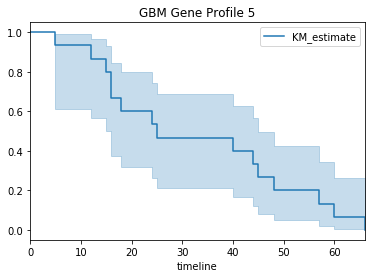

In [21]:
kmf.plot(title='GBM Gene Profile 5')

In [22]:
kmf.median_ ## median overall survival (weeks) of Group 5

25.0

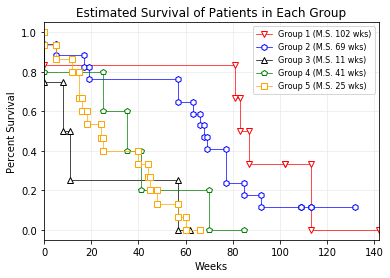

In [23]:
ax = plt.subplot(111)

kmf.fit(T, event_observed=C, label=['Group 1 (M.S. 102 wks)'])
kmf.survival_function_.plot(ax=ax,ls='steps',c='red',lw='0.7',marker='v',mfc='white')
kmf.fit(T2, event_observed=C2, label=['Group 2 (M.S. 69 wks)'])
kmf.survival_function_.plot(ax=ax,ls='steps',c='blue',lw='0.7',marker='h',mfc='white')
kmf.fit(T3, event_observed=C3, label=['Group 3 (M.S. 11 wks)'])
kmf.survival_function_.plot(ax=ax,ls='steps',c='black',lw='0.7',marker='^',mfc='white')
kmf.fit(T4, event_observed=C4, label=['Group 4 (M.S. 41 wks)'])
kmf.survival_function_.plot(ax=ax,ls='steps',c='green',lw='0.7',marker='p',mfc='white')
kmf.fit(T5, event_observed=C5, label=['Group 5 (M.S. 25 wks)'])
kmf.survival_function_.plot(ax=ax,ls='steps',c='orange',lw='0.7',marker='s',mfc='white')



plt.title('Estimated Survival of Patients in Each Group')
plt.ylabel('Percent Survival')
plt.xlabel('Weeks')
plt.grid(True,c='0.92')
plt.legend(loc=1, prop={'size': 8})

In [24]:
## Group 1 versus 2
from lifelines.statistics import logrank_test
summary_= logrank_test(T, T2, C, C2, alpha=.99)

print(summary_)

<lifelines.StatisticalResult: 

t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p   
        2.2995 0.1294
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
>


In [25]:
## Group 1 versus 3
from lifelines.statistics import logrank_test
summary_= logrank_test(T, T3, C, C3, alpha=.99)

print(summary_)

<lifelines.StatisticalResult: 

t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p    
       10.6955 0.0011  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
>


In [26]:
## Group 1 versus 4
from lifelines.statistics import logrank_test
summary_= logrank_test(T, T4, C, C4, alpha=.99)

print(summary_)

<lifelines.StatisticalResult: 

t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p    
        7.0647 0.0079  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
>


In [27]:
## Group 1 versus 5
from lifelines.statistics import logrank_test
summary_= logrank_test(T, T5, C, C5, alpha=.99)

print(summary_)

<lifelines.StatisticalResult: 

t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p     
       15.5671 0.0001  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
>


In [28]:
## Group 2 versus 3
from lifelines.statistics import logrank_test
summary_= logrank_test(T2, T3, C2, C3, alpha=.99)

print(summary_)

<lifelines.StatisticalResult: 

t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p    
        9.1482 0.0025  **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
>


In [29]:
## Group 2 versus 4
from lifelines.statistics import logrank_test
summary_= logrank_test(T2, T4, C2, C4, alpha=.99)

print(summary_)

<lifelines.StatisticalResult: 

t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p   
        1.5939 0.2068
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
>


In [30]:
## Group 2 versus 5
from lifelines.statistics import logrank_test
summary_= logrank_test(T2, T5, C2, C5, alpha=.99)

print(summary_)

<lifelines.StatisticalResult: 

t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p     
       17.5526 0.0000  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
>


In [31]:
## Group 3 versus 4
from lifelines.statistics import logrank_test
summary_= logrank_test(T3, T4, C3, C4, alpha=.99)

print(summary_)

<lifelines.StatisticalResult: 

t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p   
        1.0890 0.2967
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
>


In [32]:
## Group 3 versus 5
from lifelines.statistics import logrank_test
summary_= logrank_test(T3, T5, C3, C5, alpha=.99)

print(summary_)

<lifelines.StatisticalResult: 

t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p   
        0.0606 0.8056
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
>


In [33]:
## Group 4 versus 5
from lifelines.statistics import logrank_test
summary_= logrank_test(T4, T5, C4, C5, alpha=.99)

print(summary_)

<lifelines.StatisticalResult: 

t_0=-1, alpha=0.99, null_distribution=chi squared, df=1

test_statistic      p   
        2.7824 0.0953  .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
>


In [35]:
df_2 = pd.read_csv('p-values_logrank.csv',delimiter=',',engine='python')
df_2.fillna('-')

,GROUP,1,2,3,4,5
0,1,-,0.1294,0.0011 **,0.0079 **,0.0001 ***
1,2,-,-,0.0025 **,0.2068,0.0000 ***
2,3,-,-,-,0.2967,0.8056
3,4,-,-,-,-,0.0953
4,5,-,-,-,-,-
